# `LINEAR REGRESSION (BIKE-SHARING) ASSIGNMENT`

### THE STEPS WE FOLLOW IN THIS EXERCISE ARE AS FOLLOWS:
1. `READING & UNDERSTANDING THE DATA.`
2. `VISUALISING THE DATA(mapping).`
3. `DATA PREPRATION(dummy variables).`
4. `SPLITTING INTO TRAIN-TEST SET.`
5. `RESCALING.`
6. `TRAINING THE MODEL (dividing into X & y).`
7. `BUILDING A LINEAR MODEL (using RFE & statsmodel & checking VIF also).`
8. `RESIDUAL ANALYSIS.`
9. `PREDICTION & EVALUATION ON TEST-SET.`

## *IMPORTING NECESSARY LIBRARIES*:
- **I AM IMPORTING ALL THE LIBRARIES THAT WE HAVE USED IN THIS ASSIGNMENT HERE ONLY.**

In [1]:
# IMPORTING NECESSARY LIBRARIES REQUIRED FOR THE ANALYSIS

import numpy as np               # ALGEBRIC MODULE
import pandas as pd              # DATAFRAME MODULE 
import matplotlib.pyplot as plt  # VISUALISATION MODULE
import seaborn as sns            # VISUALISATION MODULE

import statsmodels.api as sm     # STATISTICAL MODULE(for adding constant and detailed summary of model)
from statsmodels.stats.outliers_influence import variance_inflation_factor #FOR CALCULATING VIF(multicollinearity b/w variables)

import sklearn                                           # FOR VARIOUS ML TASKS
from sklearn.model_selection import train_test_split     # FOR TRAIN-TEST SPLIT OF DATA
from sklearn.preprocessing import MinMaxScaler           # FOR NORMALISATION (b/w 0 & 1)
from sklearn.metrics import r2_score                     # FOR CALCULATING R2(square) OF TRAIN-TEST SET
from sklearn.metrics import mean_squared_error           # FOR CALCULATING MEAN SQUARED ERROR(how close regression line is)
from sklearn.linear_model import LinearRegression        # FOR PERFORMING REGRESSION TASK
from sklearn.feature_selection import RFE                # FOR CALCULATING RFE(recursive feature elimination)

In [2]:
# IMPORTING WARNINGS SO THAT WARNINGS WILL NOT COME AS AN OUTPUT FOR OUR VISUALS AND MAKE IT LOOK BAD

import warnings
warnings.filterwarnings("ignore")

In [3]:
# I'AM SETTING AN OPTION TO DISPLAY MAX ROWS AND COLUMNS.

pd.set_option('display.max_columns', 1000)  # THIS WILL DISPLAY MAXIMUM 1000 COLUMNS
pd.set_option('display.max_rows', 1000)     # THIS WILL DISPLAY MAXIMUM 1000 ROWS

# STEP-1 : `READING & UNDERSTANDING THE DATA`

In [4]:
# READING THE DATA-SET

bike_sharing = pd.read_csv('day.csv')
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# DETERMIMING THE SHAPE OF DATA-SET

bike_sharing.shape

(730, 16)

In [6]:
# GETTING FULL INFORMATION ABOUT DATA GIVEN

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# AS WE CAN SEE THAT 'dteday' DTYPE IS OBJECT TYPE BUT IT IS IN DATE FORMAT SO CONVERTING IT TO DATE TIME FORMAT

bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'], format='%d-%m-%Y')

In [8]:
# AND AS WE CAN SEE THAT 'instant' COLUMN IS JUST A INDEX COLUMN REFERRING TO NUMBER's ONLY SO WE CAN DROP IT

bike_sharing.drop('instant', axis=1, inplace=True)

In [9]:
# AND AS WE CAN SEE THAT WE DON't NEED BOTH 'casual' AND 'registered' COLUMNS BECAUSE WE HAVE THEIR TOTAL COUNT IN 'cnt' COLUMN
# SO WE WILL DROP BOTH COLUMN

bike_sharing.drop(['casual', 'registered'], axis=1, inplace=True)

In [10]:
# GETTING INFORMATION ABOUT REMAINING DATA

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 74.3 KB


In [11]:
# STASTICAL CALCULATION OF DATA

bike_sharing.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [12]:
# CHECKING FOR NULL VALUES

bike_sharing.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

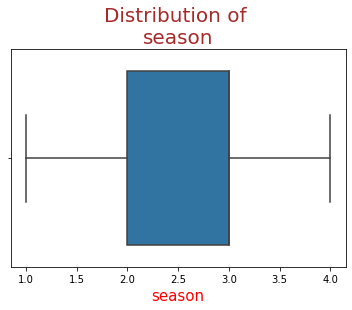

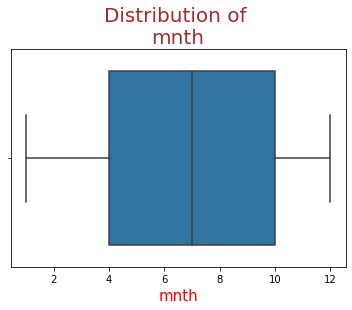

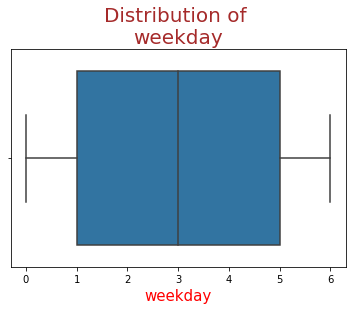

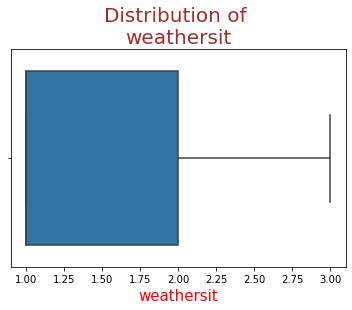

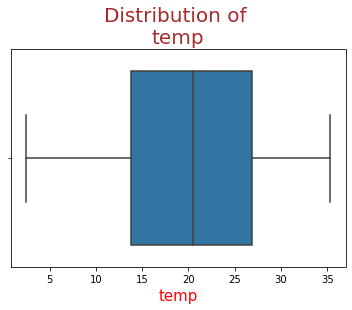

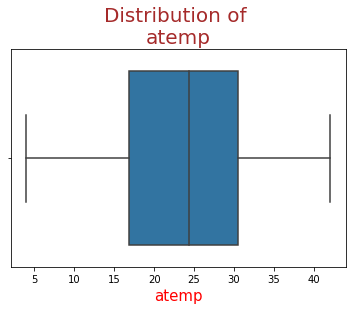

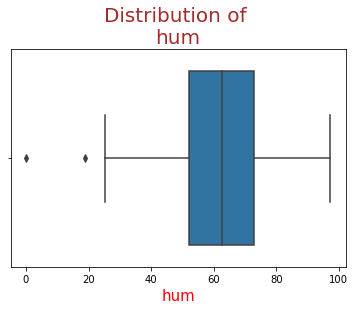

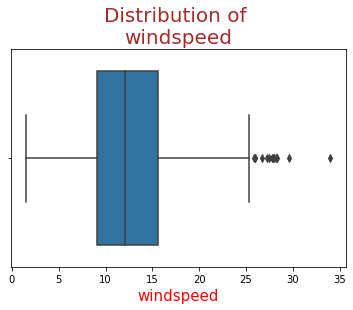

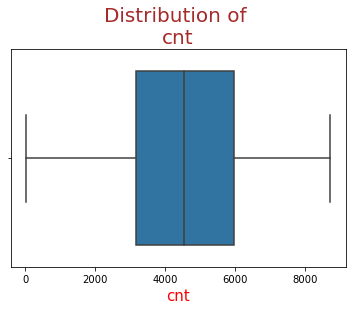

In [13]:
# I'AM CREATING A LIST AND RUNNING A FOR-LOOP FOR FINDING OUTLIERS IN COLUMNS

outliers_checking = bike_sharing[['season','mnth','weekday','weathersit','temp','atemp',
                   'hum','windspeed','cnt']]       # LIST COLUMN

for i in outliers_checking:
    sns.boxplot(bike_sharing[i])      # CREATING A BOXPLOT TO CHECK FOR OUTLIERS
    plt.xlabel(i, fontdict={"fontsize":15, "fontweight":8, "color":"red"})      # GIVING NAME FOR X-AXIS
    plt.title("Distribution of \n" +i,fontdict={"fontsize":20, "fontweight":10, "color":"brown"})   # GIVING TITLE
    plt.show()

- **AS WE CAN SEE THERE ARE `OUTLIERS` IN 2 VARIABLES BUT THAT CAN BE `IGNORABLE/ACCEPTABLE` AS THE OUTLIERS ALSO FOLLOW A PATTER AND IT WILL NOT HAMPER OUR MODEL SO WE WILL NOT REMOVE THE OUTLIERS AND MOVE AHEAD WITH CASE STUDY.**

# STEP-2 : `VISUALISING THE DATA`

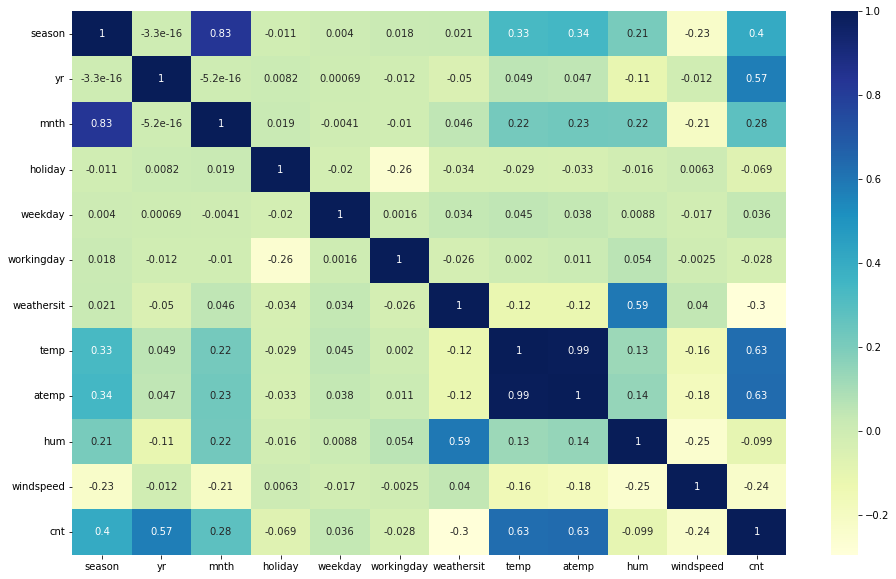

In [14]:
# PLOTTING HEATMAP FOR CORRELATION B/W VARIABLES

plt.figure(figsize=[16,10])
sns.heatmap(bike_sharing.corr(), annot=True, cmap='YlGnBu')
plt.show()

### OBSERVATIONS:
- TEMP(0.63), ATEMP(0.63) & YEAR(0.57) HAS POSITIVE CORRELATION WITH CNT(target variable).
- WINDSPEED(-0.24), HUM(-0.099) & WEATHER-SITUATION(-0.3) HAS NEGATIVE CORRELATION WITH CNT(target variable).

## MAPPING

- **MAPPING THE COLUMNS FOR UNDERSTANDING VISUALIZATION EASILY**

In [15]:
# LOOKING AT FIRST FIVE ROWS OF DATA-SET

bike_sharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


- **FROM THE `DATA DICTIONARY` GIVEN TO US WE CAN SEE THAT THERE ARE SOME `CATEGORICAL VARIABLES` WHICH HAS SOME SPECIFIC `REPRESENTATION`, SO WE WILL CHANGE THEM TO THAT SPECIFIC GIVEN REPRESENTATION's.**
- **AND I AM NOT CHANGING THE `HOLIDAY AND WORKING DAY COLUMNS` BECAUSE THEY ARE ALREADY IN `0 AND 1 FORMAT` SO WE DON't NEED TO CHANGE THAT.**

### REPRESENTATION's :
- season : season (1:spring, 2:summer, 3:fall, 4:winter)

- yr : year (0: 2018, 1:2019)

- mnth : month ( 1 to 12)

- weekday : day of the week

- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
# MAPPING ALL THE REPRESENTATION's TO THERE SPECIFIC COLUMNS

bike_sharing['season'] = bike_sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike_sharing['yr'] = bike_sharing['yr'].map({0:2018, 1:2019})

bike_sharing['mnth'] = bike_sharing['mnth'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                                            7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

bike_sharing['weekday'] = bike_sharing['weekday'].map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',
                                                      5:'Friday', 6:'Saturday'})

bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1:'Clear(few_clouds)', 2:'Mist + Cloudy', 
                                                             3:'Light_rain(snow) + Thunderstorm', 
                                                             4:'Heavy_rain(snow+fog) + Ice_pallets'})

In [17]:
# CHECKING IF MAPPING IS DONE OR NOT

bike_sharing.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
# CHECKING IF MAPPING IS DONE OR NOT

bike_sharing.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [19]:
# CHECKING IF MAPPING IS DONE OR NOT

bike_sharing.mnth.value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64

In [20]:
# CHECKING IF MAPPING IS DONE OR NOT

bike_sharing.weekday.value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

In [21]:
# CHECKING IF MAPPING IS DONE OR NOT

bike_sharing.weathersit.value_counts()

Clear(few_clouds)                  463
Mist + Cloudy                      246
Light_rain(snow) + Thunderstorm     21
Name: weathersit, dtype: int64

In [22]:
# CROSS-CHECKING FORMAT

bike_sharing.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [23]:
# CROSS-CHECKING FORMAT

bike_sharing.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

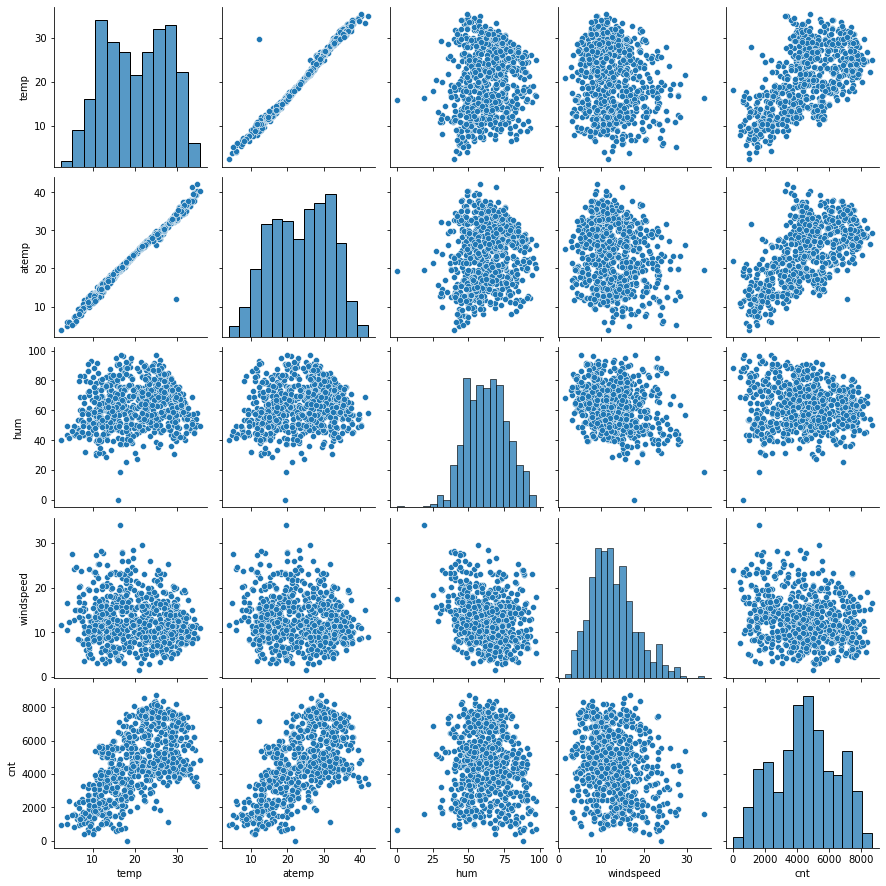

In [24]:
# VISUALISING NUMERICAL VARIABLES

sns.pairplot(bike_sharing[['temp','atemp','hum','windspeed','cnt']])
plt.show()

### OBSERVATIONS:
1. `TEMP` & `ATEMP` HAVE A LINEAR RELATIONSHIP WITH `TARGET VARIABLE(cnt)`.
2. `HUM` & `WINDSPEED` DON't HAVE ANY RELATIONSHIP WITH `TARGET VARIABLE(cnt)`.

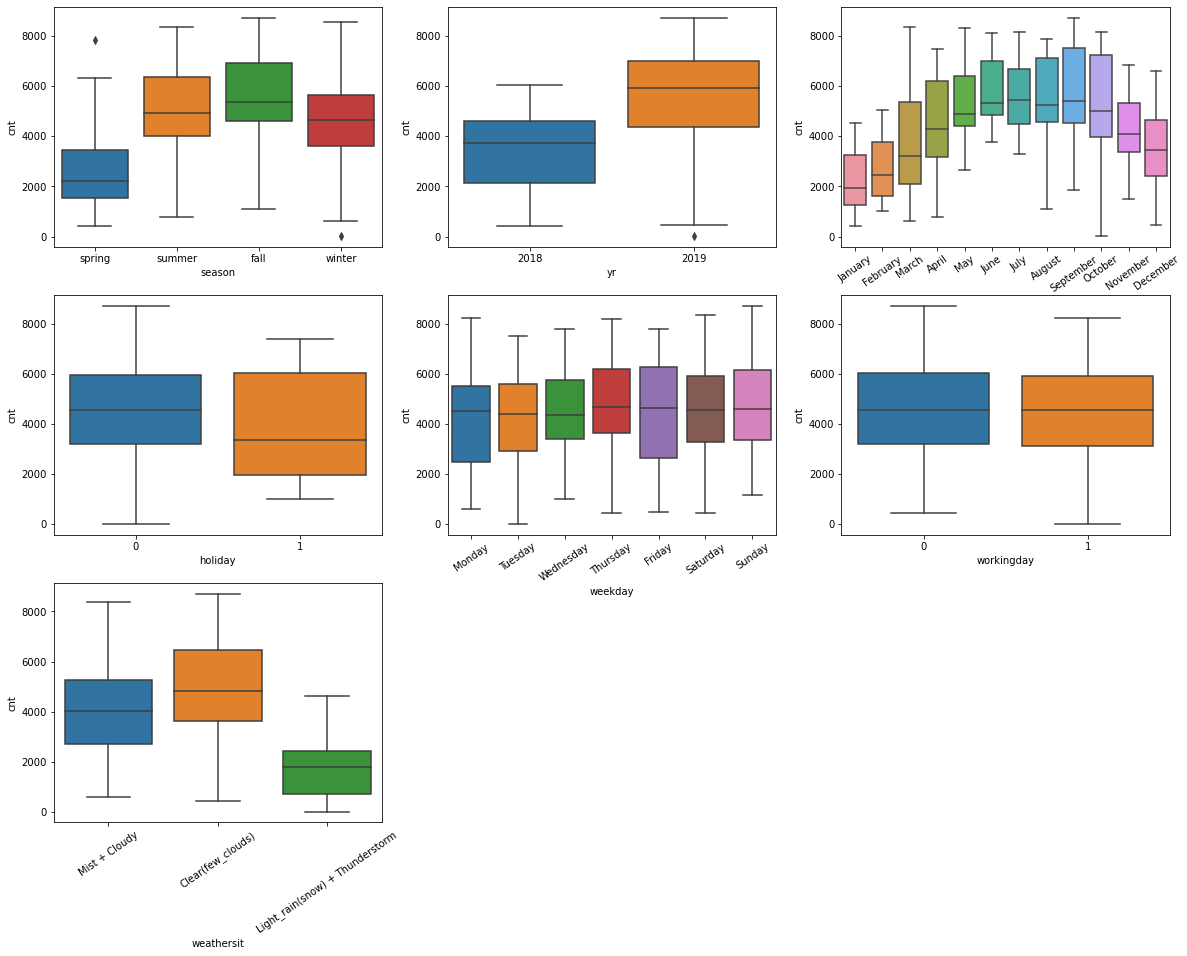

In [25]:
# VISUALISING CATEGORICAL VARIABLES

plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.xticks(rotation=35)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.xticks(rotation=35)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.xticks(rotation=35)
plt.show()

### OBSERVATIONS:
1. SEASON `FALL` HAS HIGHEST COUNT OF RIDERS AND SEASON `SPRING` HAS LOWEST COUNT OF RIDERS.
2. YEAR `2019` HAD HIGHER COUNT AS COMPARED TO YEAR `2018`.
3. `SEPTEMBER` HAS THE HIGHEST COUNT OF RIDER's AND `JANUARY` HAS LOWEST COUNT OF RIDER's.
4. THE BIKE DEMANDS LOOK LIKE CONSTANT THROUGHOUT THE WEEK-DAYS.
5. ACCORDING TO WEATHER SITUATION's THE COUNT OF RIDER's IS HIGHER WHEN WEATHER IS CLEAR.

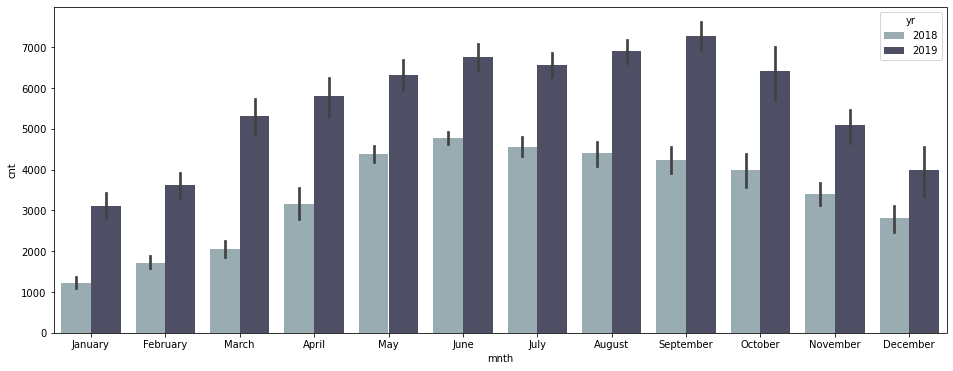

In [26]:
# MONTH vs CNT w.r.t. YEAR

plt.figure(figsize=[16,6])
sns.barplot(x='mnth', y='cnt', hue='yr', data = bike_sharing, palette="bone_r")
plt.show()

### OBSERVATIONS:
- JUNE MONTH HAD THE HIGHEST COUNT IN YEAR 2018.
- SEPTEMBER MONTH HAD THE HIGHEST COUNT IN YEAR 2019.
- IN 2019, COUNT OF RENTED BIKE ARE MORE IN EVERY MONTH THAN THE COUNT OF RENTED BIKE IN 2018.

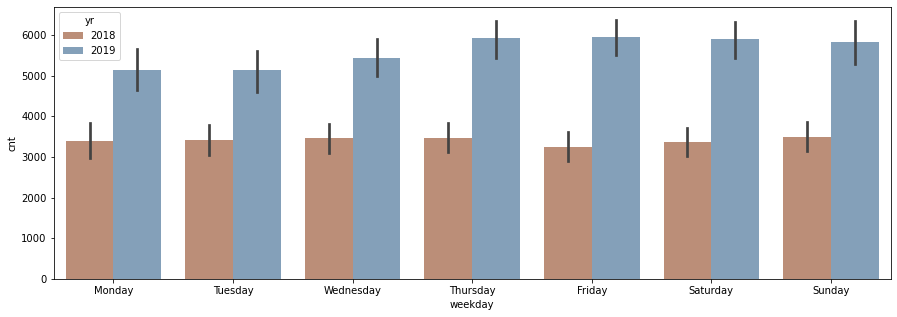

In [27]:
# WEEKDAY vs CNT w.r.t. YEAR

plt.figure(figsize=[15,5])
sns.barplot(x='weekday', y='cnt', hue='yr', data = bike_sharing, palette="twilight_shifted_r")
plt.show()

### OBSERVATIONS:
- THE BIKE DEMAND LOOKS LIKE CONSTANT THROUGH-OUT ALL DAY.
- BIKE DEMAND's ARE HIGHER IN 2019 COMPARED TO 2018.

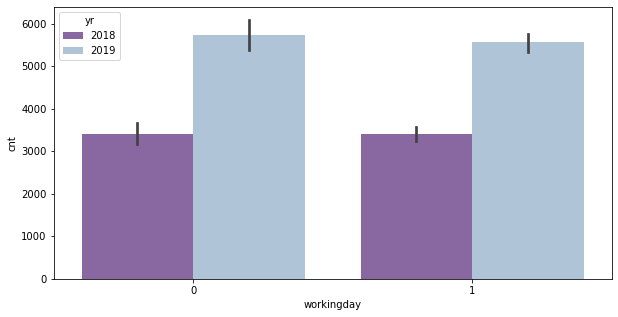

In [28]:
# WORKING-DAY vs CNT w.r.t. YEAR

plt.figure(figsize=[10,5])
sns.barplot(x='workingday', y='cnt', hue='yr', data = bike_sharing, palette="BuPu_r")
plt.show()

### OBSERVATIONS:
- THIS ALSO LOOKS LIKE CONSTANT.
- AGAIN 2019 HAS MORE DEMAND's THAN 2018.

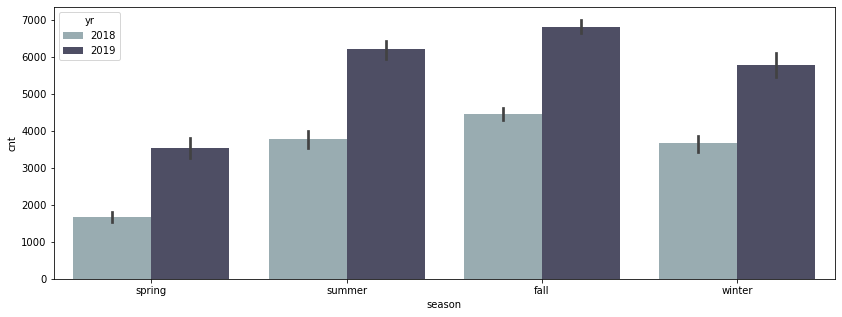

In [29]:
# SEASON vs CNT w.r.t. YEAR

plt.figure(figsize=[14,5])
sns.barplot(x='season', y='cnt', hue='yr', data = bike_sharing, palette="bone_r")
plt.show()

### OBSERVATIONS:
- FALL SEASON HAS HIGHER BIKE DEMAND, FOLLOWED BY SUMMER, FOLLOWED BY WINTER.
- THE LEAST BIKE's ARE RENTED IN SPRING.
- AGAIN IN 2019 MORE BIKE's ARE RENTED w.r.t. 2018.

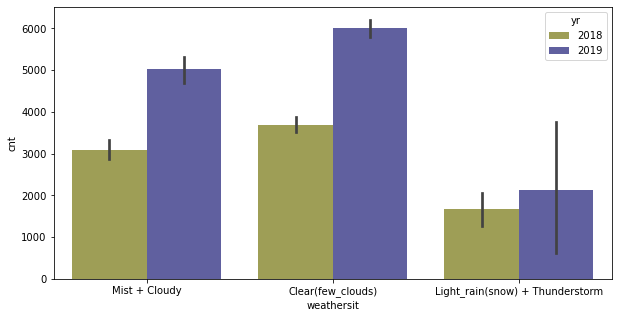

In [30]:
# WEATHER-SITUATION vs CNT w.r.t. YEAR

plt.figure(figsize=[10,5])
sns.barplot(x='weathersit', y='cnt', hue='yr', data = bike_sharing, palette="gist_stern_r")
plt.show()

### OBSERVATIONS:
- MOST BIKE's ARE RENTED WHEN WEATHER IS CLEAR, FOLLOWED BY MIST+CLOUDY WEATHER, FOLLOWED BY LIGHT SNOW/RAIN.
- NO BIKE's ARE RENTED DURING HEAVY RAIN/SNOW
    - weathersit : 
		- 1: `Clear, Few clouds, Partly cloudy, Partly cloudy`
		- 2: `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist`
		- 3: `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`
		- 4: `Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog`

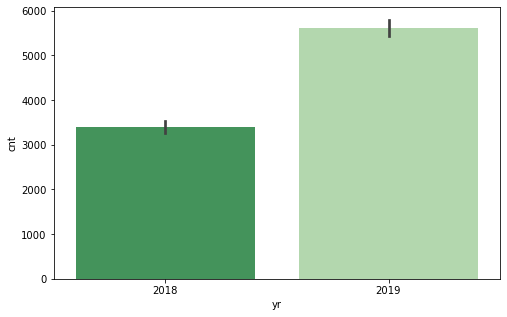

In [31]:
# YEAR vs CNT

plt.figure(figsize=[8,5])
sns.barplot(x='yr', y='cnt', data = bike_sharing, palette="Greens_r")
plt.show()

### OBSERVATIONS:
- 2019 HAS MORE DEMAND OF RENTED BIKE THAN 2018.

# STEP-3 : `DATA PREPRATION`

In [32]:
# WE DROP THE 'dteday' COLUMN AS WE HAVE THE 'year' AND 'month' COLUMN SO IT IS OF NO USE TO US

bike_sharing.drop('dteday', axis=1, inplace=True)

In [33]:
# LOOKING AT FIRST FIVE ROWS OF DATA-SET AFTER MAPPING AND DROPPING

bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,0,Monday,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,0,Tuesday,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,0,Wednesday,1,Clear(few_clouds),8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,0,Thursday,1,Clear(few_clouds),8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,0,Friday,1,Clear(few_clouds),9.305237,11.46350,43.6957,12.522300,1600


## DUMMY VARIABLES

In [34]:
# CREATING DUMMY VARIABLES FOR SEASON AND DROPPING FIRST

dummy_season = pd.get_dummies(bike_sharing['season'], drop_first=True)
dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
# CREATING DUMMY VARIABLES FOR MONTH AND DROPPING FIRST

dummy_month = pd.get_dummies(bike_sharing['mnth'], drop_first=True)
dummy_month.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
# CREATING DUMMY VARIABLES FOR WEEK-DAY AND DROPPING FIRST

dummy_weekday = pd.get_dummies(bike_sharing['weekday'], drop_first=True)
dummy_weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [37]:
# CREATING DUMMY VARIABLES FOR WEATHER SITUATION AND DROPPING FIRST

dummy_weather = pd.get_dummies(bike_sharing['weathersit'], drop_first=True)
dummy_weather.head()

,Light_rain(snow) + Thunderstorm,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [38]:
# CREATING DUMMY VARIABLES FOR YEAR AND DROPPING FIRST

dummy_year = pd.get_dummies(bike_sharing['yr'], drop_first=True)
dummy_year.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [39]:
# CONCATENATING ALL THE DUMMY VARS WITH MAIN DATA-SET

bike_sharing = pd.concat([bike_sharing, dummy_season, dummy_month, dummy_weekday, dummy_weather, dummy_year], axis=1)

In [40]:
# DROPPING THE MAIN COLUMNS BECAUSE WE HAVE CREATED THE DUMMY VARS OF THESE COLUMNS SO THEY ARE OF NO USE TO THE MODEL

bike_sharing.drop(['season','mnth','weekday','weathersit', 'yr'], axis=1, inplace=True)
bike_sharing.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# GETTING THE SHAPE OF DATA-SET AFTER ADDING DUMMIES AND DROPPING SOME COLUMNS

bike_sharing.shape

(730, 30)

In [42]:
# GETTING FULL INFORMATION OF DATA-SET

bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   holiday                          730 non-null    int64  
 1   workingday                       730 non-null    int64  
 2   temp                             730 non-null    float64
 3   atemp                            730 non-null    float64
 4   hum                              730 non-null    float64
 5   windspeed                        730 non-null    float64
 6   cnt                              730 non-null    int64  
 7   spring                           730 non-null    uint8  
 8   summer                           730 non-null    uint8  
 9   winter                           730 non-null    uint8  
 10  August                           730 non-null    uint8  
 11  December                         730 non-null    uint8  
 12  February              

In [43]:
# STATIC CALCULATION OF DATA-SET

bike_sharing.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986,0.500000
std,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004,0.500343
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# STEP-4 : `SPLITTING DATA-SET INTO TRAIN & TEST SET`

In [44]:
# WE HAVE ALREADY IMPORTED THE NECESSARY LIBRARY FOR TRAIN-TEST SPLIT
# SPLITTING DATA-SET INTO TRAIN-TEST SET WITH 70-30 RATIO

df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


# STEP-5 : `RESCALING`
- THERE ARE TWO COMMON WAYS OF RESCALING:
    - `Min-Max scaling (Normalisation) : Between 0 and 1`
    - `Standardisation (  (mu)mean-0, (s.d)sigma-1  )`
    
- HOW THE TWO WAYS MENTIONED ABOVE WORK's:
    - `x (vector)`
    - `Normalisation = (x - xmin) / (xmax - xmin)`
    - `Standardisation = (x - mu) / sigma(s.d)`

### STEPS FOR RESCALING :-
1. INSTANTIATE AN OBJECT
2. CREATE A LIST OF NUMERIC VARIABLES
3. FIT ON DATA :-
    - fit(): `learns xmin, xmax`
    - transform(): `(x - xmin) / (xmax - xmin)`
    - fit_transform(): `done both at one go`

In [45]:
# STEP-1

scaler = MinMaxScaler()

In [46]:
# STEP-2 & STEP-3

num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1
728,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [47]:
# CHECKING IF MinMaxScaler WORKED OR NOT

df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


# STEP-6 : `TRAINING THE MODEL`

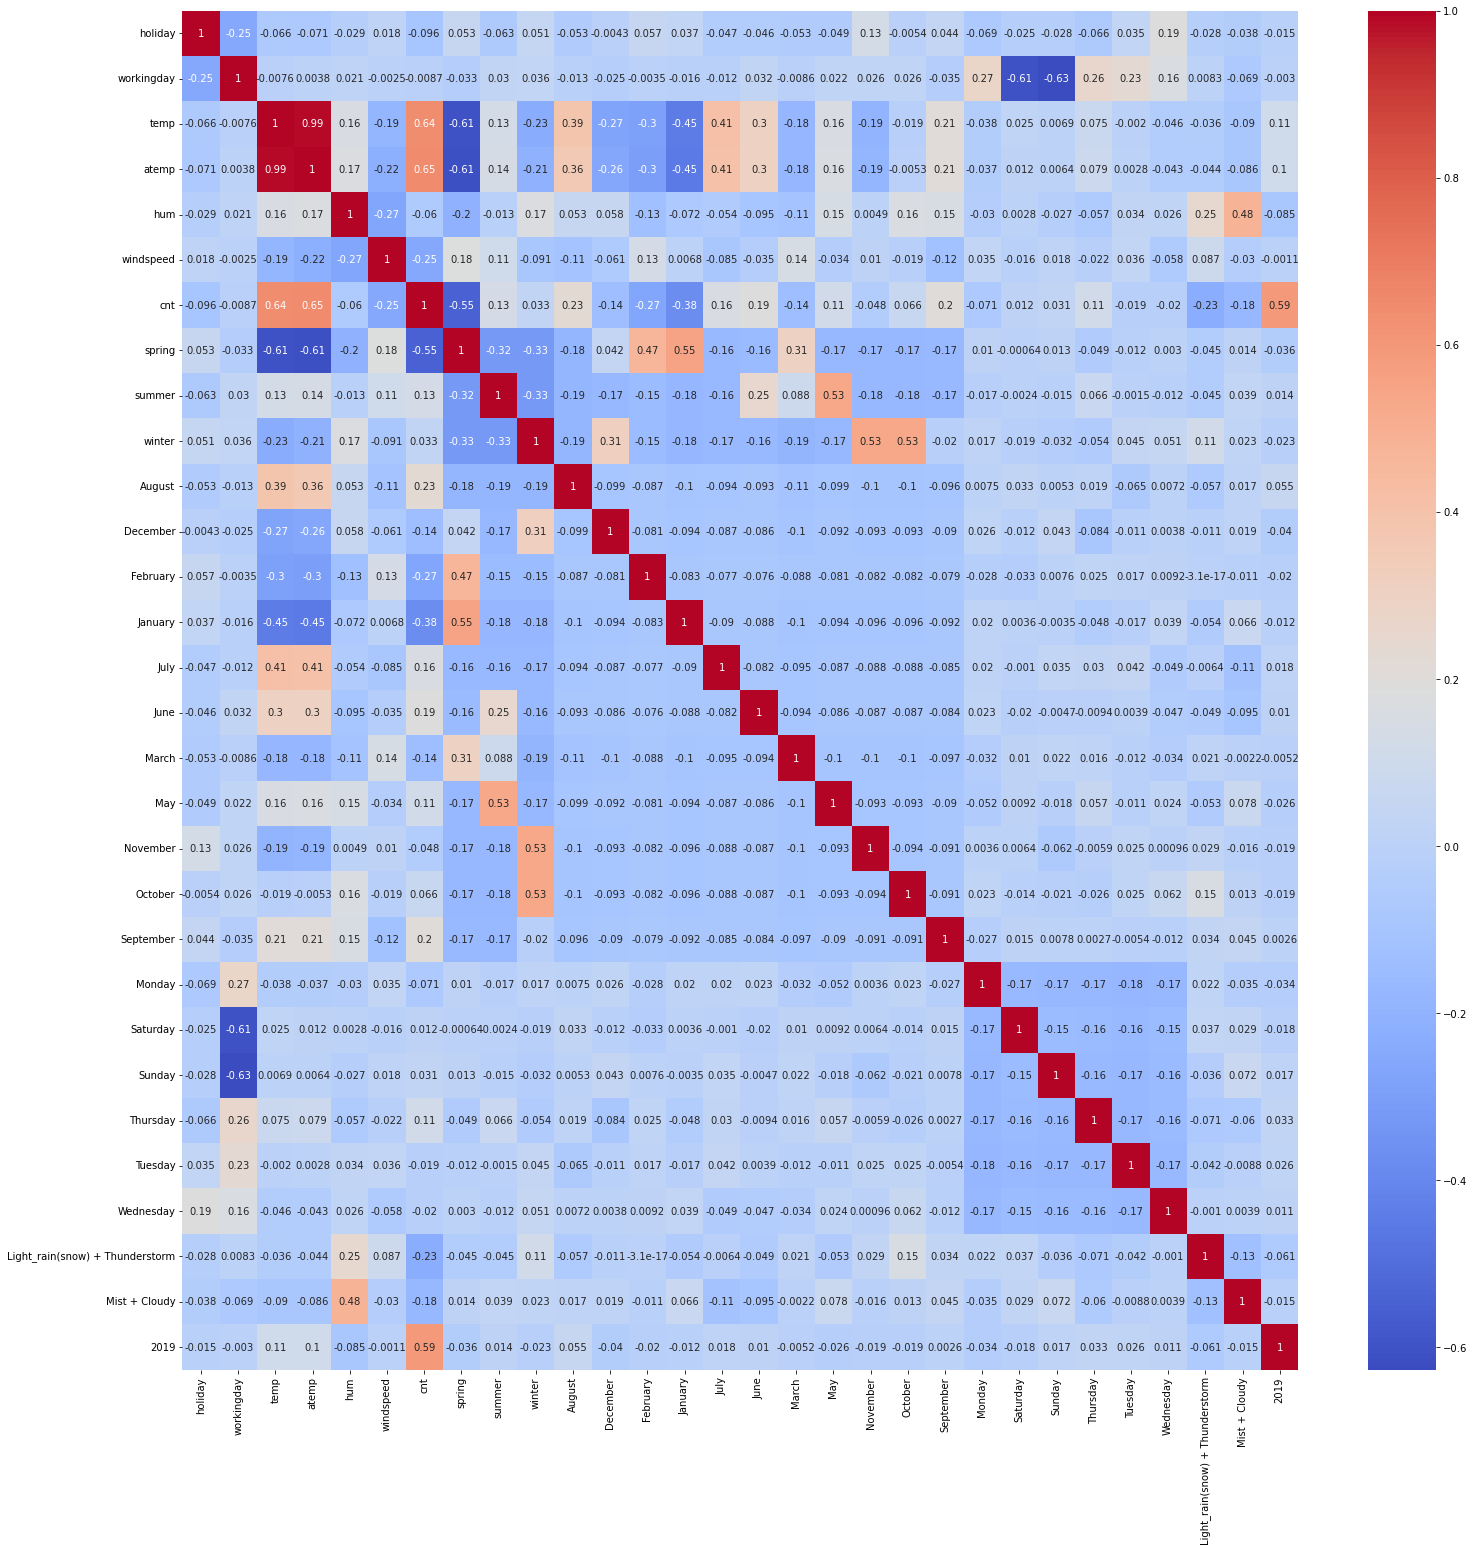

In [48]:
# PLOTTING A HEATMAP TO SEE CORRELATION B/W VARIABLES

plt.figure(figsize=[25,25])
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True)
plt.show()

### OBSERVATIONS:
- WE CAN SEE POSITIVE CORRELATION OF CNT(target variable) WITH TEMP(0.64), ATEMP(0.65) & 2019(0.59).
- WE CAN SEE NEGATIVE CORRELATION OF CNT(target variable) WITH SPRING(-0.55) & JANUARY(-0.38).

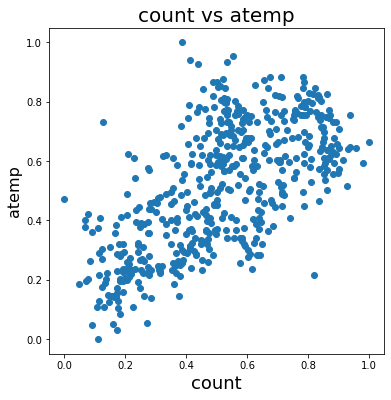

In [49]:
# PLOTTING A SCATTER PLOT TO CHECK THE RELATION OF COUNT AND ATEMP

plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.title('count vs atemp', fontsize=20)              # Plot heading 
plt.xlabel('count', fontsize=18)                          # X-label
plt.ylabel('atemp', fontsize=16)                          # Y-label
plt.show()

### OBSERVATION :
- AS THE ATEMP INCREASES THE COUNT OF BIKE RENTED ALSO INCREASES.

- **BY LOOKING AT THE HEATMAP, SINCE NOT MUCH CAN BE STATED ABOUT THE OTHER INDEPENDENT VARIABLES, HENCE WE WILL BUILD A MODEL USING ALL THE COLUMNS.**

## DIVIDING INTO X & y

In [50]:
X_train = df_train
y_train = df_train.pop('cnt')

In [51]:
# CHECKING IF THEY ARE DIVIDED OR NOT

X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
653,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1
728,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
482,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [52]:
# CHECKING IF THEY ARE DIVIDED OR NOT

y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# STEP-7 : `BUILDING A LINEAR MODEL`

In [53]:
# we will be using the LinearRegression function from SciKit Learn for its compatibility 
# with RFE (which is a utility from sklearn)

# CREATE MODEL
lm = LinearRegression()

# FIT MODEL
lm.fit(X_train, y_train)

LinearRegression()

## RFE
Recursive feature elimination

In [54]:
# RUNNING RFE WITH 16 FEATURE TO SELECT ON THE MODEL

rfe = RFE(estimator=lm, n_features_to_select=16)

rfe = rfe.fit(X_train, y_train)

In [55]:
# CHECKING THE COLUMNS NAME, SUPPORT & RANKS OF VARIABLES

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 9),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 6),
 ('November', True, 1),
 ('October', False, 11),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('Light_rain(snow) + Thunderstorm', True, 1),
 ('Mist + Cloudy', True, 1),
 (2019, True, 1)]

In [56]:
# STORING ALL THE SUPPORTED COLUMNS IN ONE VARIABLE

col = X_train.columns[rfe.support_]
col

Index([                        'holiday',                            'temp',
                                   'hum',                       'windspeed',
                                'spring',                          'summer',
                                'winter',                        'December',
                              'February',                         'January',
                                  'July',                        'November',
                             'September', 'Light_rain(snow) + Thunderstorm',
                         'Mist + Cloudy',                              2019],
      dtype='object')

In [57]:
# CHECKING WHICH COLUMNS IT DOESN't SUPPORT

X_train.columns[ ~ rfe.support_]

Index(['workingday', 'atemp', 'August', 'June', 'March', 'May', 'October',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## BUILDING MODEL USING STATSMODEL FOR DETAILED STATISTICS

In [58]:
# CREATING A DATA-FRAME WITH RFE SELECTED VARIABLES

X_train_rfe = X_train[col]

## `MODEL-1`

In [59]:
# ADDING CONSTANT

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,holiday,temp,hum,windspeed,spring,summer,winter,December,February,January,July,November,September,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
653,1.0,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0,0,1
576,1.0,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0,0,0,1
426,1.0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0,1,1
728,1.0,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,0,1
482,1.0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,1,1


In [60]:
# RUNNING LINEAR MODEL AND LOOKING AT THE SUMMARY OF MODEL

lmodel_1 = sm.OLS(y_train, X_train_rfe).fit()
lmodel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.15e-188
Time:                        13:29:04   Log-Likelihood:                 516.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     493   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3320      0.037      9.056      0.000       0.260       0.404
holiday                            -0.0887      0.026     -3.469      0.001      -0.139      -0.038
temp                                0.4639      0.038     12.156      0.000       0.389       0.539
hum                                -0.1581      0.038     -4.189      0.000      -0.232      -0.084
windspeed                          -0.1897      0.026     -7.369      0.000      -0.240      -0.139
spring                             -0.0518      0.022     -2.353      0.019      -0.095      -0.009
summer                              0.0374      0.015      2.425      0.016       0.007       0.068
winter                              0.1016      0.018      5.662      0.000       0.066       0.137
December                           -0.0465      0.018     -2.541      0.011      -0.082      -0.011
February                           -0.0361      0.022     -1.667      0.096      -0.079       0.006
January                            -0.0631      0.021     -2.936      0.003      -0.105      -0.021
July                               -0.0545      0.018     -2.995      0.003      -0.090      -0.019
November                           -0.0458      0.019     -2.421      0.016      -0.083      -0.009
September                           0.0734      0.017      4.349      0.000       0.040       0.107
Light_rain(snow) + Thunderstorm    -0.2495      0.026     -9.468      0.000      -0.301      -0.198
Mist + Cloudy                      -0.0562      0.010     -5.375      0.000      -0.077      -0.036
2019                                0.2307      0.008     28.597      0.000       0.215       0.247
==============================================================================
Omnibus:                       71.849   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.456
Skew:                          -0.726   Prob(JB):                     4.82e-39
Kurtosis:                       5.489   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# DROPPING THE CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

## CHECKING VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [62]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,31.58
1,temp,18.34
4,spring,5.45
3,windspeed,4.73
6,winter,4.06
5,summer,2.81
9,January,2.38
14,Mist + Cloudy,2.32
15,2019,2.09
8,February,1.92


In [63]:
# DROPPING ONE VARIABLE WITH HIGH P-VALUE

X_train_rfe.drop('February', axis=1, inplace=True)

## `MODEL-2`

In [64]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# RUNNING LINEAR MODEL AND LOOKING AT THE SUMMARY OF MODEL
lmodel_2 = sm.OLS(y_train, X_train_rfe).fit()
lmodel_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          3.34e-189
Time:                        13:29:04   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3202      0.036      8.886      0.000       0.249       0.391
holiday                            -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                                0.4800      0.037     12.977      0.000       0.407       0.553
hum                                -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                          -0.1885      0.026     -7.312      0.000      -0.239      -0.138
spring                             -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer                              0.0408      0.015      2.659      0.008       0.011       0.071
winter                              0.1034      0.018      5.763      0.000       0.068       0.139
December                           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
January                            -0.0437      0.018     -2.415      0.016      -0.079      -0.008
July                               -0.0555      0.018     -3.046      0.002      -0.091      -0.020
November                           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
September                           0.0749      0.017      4.438      0.000       0.042       0.108
Light_rain(snow) + Thunderstorm    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
Mist + Cloudy                      -0.0559      0.010     -5.338      0.000      -0.076      -0.035
2019                                0.2303      0.008     28.511      0.000       0.214       0.246
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# DROPPING THE CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [66]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,30.94
1,temp,17.80
3,windspeed,4.72
4,spring,4.37
6,winter,4.06
5,summer,2.81
13,Mist + Cloudy,2.32
14,2019,2.09
10,November,1.83
8,January,1.75


In [67]:
# DROPPING ONE VARIABLE WITH HIGH VIF

X_train_rfe.drop('December', axis=1, inplace=True)

## `MODEL-3`

In [68]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# RUNNING LINEAR MODEL AND LOOKING AT THE SUMMARY OF MODEL
lmodel_3 = sm.OLS(y_train, X_train_rfe).fit()
lmodel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.25e-189
Time:                        13:29:04   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3030      0.035      8.597      0.000       0.234       0.372
holiday                            -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp                                0.5052      0.035     14.369      0.000       0.436       0.574
hum                                -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed                          -0.1854      0.026     -7.179      0.000      -0.236      -0.135
spring                             -0.0564      0.021     -2.664      0.008      -0.098      -0.015
summer                              0.0466      0.015      3.080      0.002       0.017       0.076
winter                              0.0986      0.018      5.519      0.000       0.064       0.134
January                            -0.0339      0.018     -1.929      0.054      -0.068       0.001
July                               -0.0562      0.018     -3.076      0.002      -0.092      -0.020
November                           -0.0253      0.017     -1.463      0.144      -0.059       0.009
September                           0.0798      0.017      4.755      0.000       0.047       0.113
Light_rain(snow) + Thunderstorm    -0.2418      0.026     -9.187      0.000      -0.293      -0.190
Mist + Cloudy                      -0.0543      0.010     -5.182      0.000      -0.075      -0.034
2019                                0.2301      0.008     28.386      0.000       0.214       0.246
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# DROPPING THE CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [70]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,29.12
1,temp,16.80
3,windspeed,4.71
4,spring,4.37
6,winter,3.78
5,summer,2.79
12,Mist + Cloudy,2.29
13,2019,2.09
7,January,1.67
8,July,1.59


In [71]:
# DROPPING ONE VARIABLE WITH HIGH P-VALUE

X_train_rfe.drop('November', axis=1, inplace=True)

## `MODEL-4`

In [72]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# RUNNING LINEAR MODEL AND LOOKING AT THE SUMMARY OF MODEL
lmodel_4 = sm.OLS(y_train, X_train_rfe).fit()
lmodel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          4.45e-190
Time:                        13:29:04   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2957      0.035      8.466      0.000       0.227       0.364
holiday                            -0.0968      0.026     -3.796      0.000      -0.147      -0.047
temp                                0.5127      0.035     14.720      0.000       0.444       0.581
hum                                -0.1665      0.038     -4.410      0.000      -0.241      -0.092
windspeed                          -0.1871      0.026     -7.243      0.000      -0.238      -0.136
spring                             -0.0518      0.021     -2.472      0.014      -0.093      -0.011
summer                              0.0491      0.015      3.259      0.001       0.019       0.079
winter                              0.0931      0.017      5.324      0.000       0.059       0.127
January                            -0.0331      0.018     -1.881      0.061      -0.068       0.001
July                               -0.0559      0.018     -3.056      0.002      -0.092      -0.020
September                           0.0825      0.017      4.940      0.000       0.050       0.115
Light_rain(snow) + Thunderstorm    -0.2405      0.026     -9.135      0.000      -0.292      -0.189
Mist + Cloudy                      -0.0541      0.010     -5.159      0.000      -0.075      -0.034
2019                                0.2301      0.008     28.348      0.000       0.214       0.246
==============================================================================
Omnibus:                       58.682   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.185
Skew:                          -0.624   Prob(JB):                     1.20e-29
Kurtosis:                       5.171   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# DROPPING THE CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [74]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,29.05
1,temp,16.70
3,windspeed,4.66
4,spring,4.34
6,winter,3.38
5,summer,2.78
11,Mist + Cloudy,2.28
12,2019,2.09
7,January,1.67
8,July,1.59


In [75]:
# DROPPING ONE VARIABLE WITH HIGH P-VALUE

X_train_rfe.drop('January', axis=1, inplace=True)

## `MODEL-5`

In [76]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# RUNNING LINEAR MODEL AND LOOKING AT THE SUMMARY OF MODEL
lmodel_5 = sm.OLS(y_train, X_train_rfe).fit()
lmodel_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.69e-190
Time:                        13:29:05   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2841      0.034      8.242      0.000       0.216       0.352
holiday                            -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp                                0.5300      0.034     15.739      0.000       0.464       0.596
hum                                -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed                          -0.1819      0.026     -7.066      0.000      -0.233      -0.131
spring                             -0.0562      0.021     -2.695      0.007      -0.097      -0.015
summer                              0.0519      0.015      3.457      0.001       0.022       0.081
winter                              0.0987      0.017      5.719      0.000       0.065       0.133
July                               -0.0575      0.018     -3.140      0.002      -0.094      -0.022
September                           0.0830      0.017      4.962      0.000       0.050       0.116
Light_rain(snow) + Thunderstorm    -0.2382      0.026     -9.034      0.000      -0.290      -0.186
Mist + Cloudy                      -0.0542      0.011     -5.151      0.000      -0.075      -0.034
2019                                0.2293      0.008     28.219      0.000       0.213       0.245
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# DROPPING THE CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [78]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,28.06
1,temp,16.02
3,windspeed,4.65
4,spring,4.01
6,winter,3.35
5,summer,2.78
10,Mist + Cloudy,2.28
11,2019,2.08
7,July,1.58
8,September,1.38


In [79]:
# DROPPING ONE VARIABLE WITH HIGH VIF

X_train_rfe.drop('hum', axis=1, inplace=True)

## `MODEL-6`

In [80]:
# ADDING CONSTANT
X_train_rfe = sm.add_constant(X_train_rfe)

# RUNNING LINEAR MODEL AND LOOKING AT THE SUMMARY OF MODEL
lmodel_6 = sm.OLS(y_train, X_train_rfe).fit()
lmodel_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          2.40e-187
Time:                        13:29:05   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.1996      0.030      6.758      0.000       0.142       0.258
holiday                            -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp                                0.4915      0.033     14.798      0.000       0.426       0.557
windspeed                          -0.1480      0.025     -5.893      0.000      -0.197      -0.099
spring                             -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer                              0.0453      0.015      2.971      0.003       0.015       0.075
winter                              0.0831      0.017      4.818      0.000       0.049       0.117
July                               -0.0524      0.019     -2.811      0.005      -0.089      -0.016
September                           0.0767      0.017      4.511      0.000       0.043       0.110
Light_rain(snow) + Thunderstorm    -0.2852      0.025    -11.536      0.000      -0.334      -0.237
Mist + Cloudy                      -0.0816      0.009     -9.301      0.000      -0.099      -0.064
2019                                0.2335      0.008     28.361      0.000       0.217       0.250
==============================================================================
Omnibus:                       59.298   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.189
Skew:                          -0.628   Prob(JB):                     4.41e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# DROPPING THE CONSTANT FOR CALCULATING VIF

X_train_rfe.drop('const', axis=1, inplace=True)

In [82]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.21
3,spring,2.08
10,2019,2.07
5,winter,1.79
6,July,1.58
9,Mist + Cloudy,1.55
7,September,1.34
8,Light_rain(snow) + Thunderstorm,1.08


- **AS WE CAN SEE THAT THE VIF OF `temp` is 5.09 WHICH IS HIGHER THAT 5 AND THE GENERAL THUMB OF RULE IS THAT WE DROP THE VARIABLES WHICH HAVE VIF > 5 BUT IN THIS CASE WE WILL NOT DROP THE `temp` COLUMN BECAUSE AS WE CAN SEE THAT WHEN WE USE `RFE` FOR FEATURE ELIMINATION IN THAT `atemp` COLUMN IS GONE AND `temp` WHICH MEANS TEMPERATURE IT IS JUST SLIGHTLY HIGH THEN 5 AND IT WILL BE GOOD PREDICTOR FOR BIKE RENTS ANALYSIS SO WE WILL NOT DROP THE `temp` COLUMN.**

# STEP-8 : `RESIDUAL ANALYSIS`

In [83]:
# ADDING CONSTANT

X_train_rfe = sm.add_constant(X_train_rfe)

In [84]:
# GETTING Y-PREDICTED

y_train_pred = lmodel_6.predict(X_train_rfe)
y_train_pred.head()

653    0.722317
576    0.742207
426    0.464285
728    0.388533
482    0.563435
dtype: float64

In [85]:
# RESIDUAL ANALYSIS (error term) OF TRAIN-SET

res_train = y_train - y_train_pred
res_train.head()

653    0.141926
576    0.085451
426    0.000971
728   -0.184437
482   -0.080462
dtype: float64

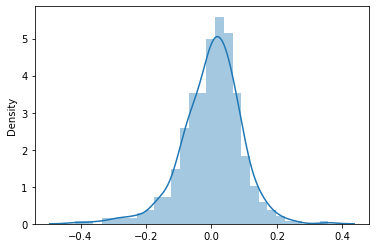

In [86]:
# PLOTTING DISTPLOT FOR CHECKING NORMALLY DISTRIBUTED AND CENTERED TO 0

sns.distplot(res_train)
plt.show()

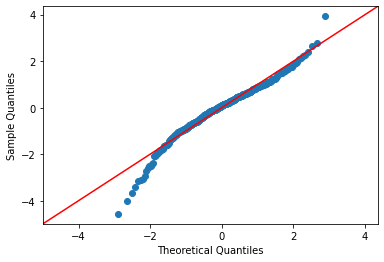

In [87]:
# PLOTTING THE QQ-PLOT OF ERROR TERMS TO CROSS-VERIFY ABOVE CONCLUSION

sm.qqplot(res_train, fit=True, line='45')
plt.show()

### OBSERVATIONS:
- FROM GRAPH-1 WE CAN CLEARLY SEE THAT THE ERROR TERM ARE CENTERED AROUND 0 AND ARE NORMALLY DISTRIBUTED.
- FROM GRAPH-2 WE CAN SEE THAT MOST OF THE DATA POINT's LIE ON THE STRAIGHT LINE, WHICH INDICATES THAT THE ERROR TERMS ARE NORMALLY DISTRIBUTED.

# STEP-9 : `PREDICTIONS & EVALUATION ON TEST-SET`

## MAKING PREDICTIONS

- **WE NEVER FIT & TRANSFORM ON TEST-SET**

In [88]:
# AGAIN FOLLOWING SAME STEP OF RESCALING
# STEP-2: NUMERICAL VARIABLES
num_vars_1 = ['temp','atemp','hum','windspeed','cnt']

# STEP-3: FIT ON DATA
df_test[num_vars_1] = scaler.transform(df_test[num_vars_1])
df_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
# CHECKING IF SCALER WORKED OR NOT

df_test[num_vars_1].describe()

,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.558691,0.549198,0.627737,0.299459,0.524275
75%,0.759096,0.714132,0.743928,0.403048,0.672745
max,0.984424,0.980934,1.002146,0.807474,0.963300


## DIVIDING INTO X & y

In [90]:
X_test = df_test
y_test = df_test.pop('cnt')

In [91]:
# CHECKING IF THEY ARE DIVIDED OR NOT
 
X_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
184,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
299,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [92]:
# CHECKING IF THEY ARE DIVIDED OR NOT

y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [93]:
# CREATING NEW DATA-FRAME X_TEST_COL BY DROPPING VARIABLES FROM X_TEST & KEEPING ONLY THOSE COLUMNS WHICH THE MODEL HAS

X_train_rfe.drop('const',axis=1,inplace=True)

X_test_col = X_test[X_train_rfe.columns]

In [94]:
# ADDING CONSTANT

X_test_sm = sm.add_constant(X_test_col)
X_test_sm.head()

,const,holiday,temp,windspeed,spring,summer,winter,July,September,Light_rain(snow) + Thunderstorm,Mist + Cloudy,2019
184,1.0,1,0.831783,0.084219,0,0,0,1,0,0,1,0
535,1.0,0,0.901354,0.153728,0,1,0,0,0,0,0,1
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,1,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0,0


In [95]:
# MAKING PREDICTIONS

y_test_pred = lmodel_6.predict(X_test_sm)
y_test_pred.head()

184    0.364024
535    0.898685
299    0.403353
221    0.582725
152    0.567086
dtype: float64

## MODEL EVALUATION

In [96]:
# CALCULATING R2(square) SCORE OF TEST-SET

r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_test

0.8049418440982383

In [97]:
# CALCULATING R2(square) SCORE OF TRAIN-SET

r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_train

0.8357767594654057

In [98]:
# COMPARING THE R2(square) SCORE OF TRAIN & TEST SET

print("Train-set r2_score :" , r2_score(y_true=y_train, y_pred=y_train_pred))
print("Test-set r2_score  :" , r2_score(y_true=y_test, y_pred=y_test_pred))      

Train-set r2_score : 0.8357767594654057
Test-set r2_score  : 0.8049418440982383


- **R2_SCORE OF TEST-SET COMES OUT AS `0.8049418440982383` AND R2_SCORE OF TRAIN-SET COMES OUT AS `0.8357767594654057` WHICH ARE VERY CLOSE TO EACH OTHER, HENCE WE HAVE CREATED A GOOD MODEL AND IT IS LINEAR IN NATURE.**

In [99]:
# CALCULATING ADJUSTED R-SQUARE OF TEST-SET

n = X_test_sm.shape[0]                 # NUMBER OF ROWS IN TEST-SET
p = X_test_sm.shape[1]                 # NUMBER OF COLUMNS IN TEST-SET

adj_r2_test = (1-(1-r2_test)*(n-1)/(n-p-1))      # FORMULA FOR CALCULATING ADJUSTED R2_SCORE
adj_r2_test

0.7935792330748348

In [100]:
# CALCULATING ADJUSTED R-SQUARE OF TRAIN-SET WHICH IS ALSO IN THE MODEL-6 SUMMARY

q = X_train_rfe.shape[0]                 # NUMBER OF ROWS IN TRAIN-SET
r = X_train_rfe.shape[1]                 # NUMBER OF COLUMNS IN TRAIN-SET

adj_r2_train = (1-(1-r2_train)*(q-1)/(q-r-1))      # FORMULA FOR CALCULATING ADJUSTED R2
adj_r2_train

0.832149338489742

In [101]:
# PRINTING ADJUSTED R2-SCORE OF BOTH TRAIN & TEST-SET TOGETHER

print("Train-set adjusted r2_score :" , adj_r2_train)
print("Test-set adjusted r2_score  :" , adj_r2_test)

Train-set adjusted r2_score : 0.832149338489742
Test-set adjusted r2_score  : 0.7935792330748348


- **ADJUSTED-R2_SCORE OF TEST-SET COMES OUT AS `0.7935792330748348` AND ADJUSTED-R2_SCORE OF TRAIN-SET COMES OUT AS `0.832149338489742` WHICH ARE CLOSE TO EACH OTHER.**

In [102]:
# MEAN-SQUARED ERROR OF TRAIN & TEST SET JUST TO CROSS CHECK OUR MODEL NATURE

print("Mean-squared error of Train-set :" ,mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print("Mean-squared error of Test-set  :" ,mean_squared_error(y_true=y_test, y_pred=y_test_pred))

Mean-squared error of Train-set : 0.00826747798153189
Mean-squared error of Test-set  : 0.009264444750858136


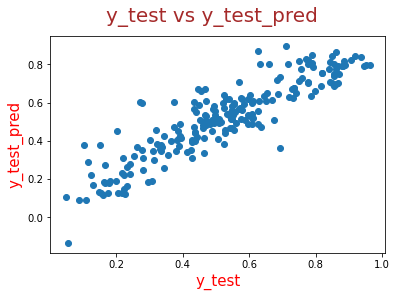

In [103]:
# PLOTTING y_test & y_test_pred TO UNDERSTAND THE SPREAD

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20, color='brown')              # Plot heading 
plt.xlabel('y_test', fontdict={"fontsize":15, "fontweight":8, "color":"red"})                          # X-label
plt.ylabel('y_test_pred', fontdict={"fontsize":15, "fontweight":8, "color":"red"})                          # Y-label
plt.show()

### OBSERVATION:
- WE CAN CONCLUDE THAT THE FINAL MODEL FIT ISN't BY CHANCE AND THAT IT HAS DESCENT PREDICTIVE POWER.

- **WE WILL MAKE SOME `REGPLOT's` TO LOOK FOR THE `PATTERN OF ERROR's ON TRAIN-SET & TEST-SET` AND SEE IF THEY HAVE SIMILAR PATTERN OR NOT.**

In [104]:
# RESIDUAL ANALYSIS (error term) OF TEST-SET

res_test = y_test - y_test_pred

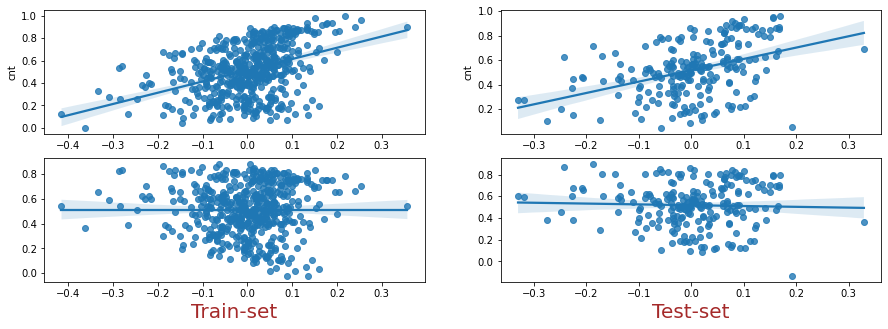

In [105]:
# PATTERNS OF ERROR OF TRAIN-SET
plt.figure(figsize=[15,5])
plt.subplot(2,2,1)
sns.regplot(x=res_train, y=y_train)
plt.subplot(2,2,3)
sns.regplot(x=res_train, y=y_train_pred)
plt.xlabel('Train-set', fontdict={"fontsize":20, "fontweight":10, "color":"brown"})

# PATTERNS OF ERROR OF TEST-SET
plt.subplot(2,2,2)
sns.regplot(x=res_test, y=y_test)
plt.subplot(2,2,4)
sns.regplot(x=res_test, y=y_test_pred)
plt.xlabel('Test-set', fontdict={"fontsize":20, "fontweight":10, "color":"brown"})

plt.show()

### OBSERVATION :
- PATTERNS OF ERROR TERM FOR BOTH THE TRAIN & TEST-SET ARE SIMILAR.

In [106]:
# LOOKING AT ALL THE COEFFICIENT PARAMETERS FOR FINAL EQUATION

lmodel_6.params

const                              0.199648
holiday                           -0.098013
temp                               0.491508
windspeed                         -0.147977
spring                            -0.066942
summer                             0.045280
winter                             0.083084
July                              -0.052418
September                          0.076686
Light_rain(snow) + Thunderstorm   -0.285155
Mist + Cloudy                     -0.081558
2019                               0.233482
dtype: float64

## FINAL EQUATION:
- WE CAN SEE THAT THE EQUATION OF OUR BEST FITTED LINE IS :-

$ cnt = 0.199648 + holiday\times(-0.098013) + temp\times(0.491508) + windspeed\times(-0.147977) + spring\times(-0.066942) + summer\times(0.045280) + winter\times(0.083084) + July\times(-0.052418) + September\times(0.076686) + LightRain\times(-0.285155) + MistCloudy\times(-0.081558) + 2019\times(0.233482) $


- AFTER FINDING THE `R-SQUARED & ADJUSTED R-SQUARED` OF BOTH TRAIN & TEST-SET WE COULD CONCLUDE THAT THE ABOVE VARIABLES CAN WELL EXPLAIN UPTO `80%` OF BIKE DEMAND.
- ALL THE POSITIVE COEFFICIENTS LIKE `TEMPERATURE, SUMMER, WINTER, SEPTEMBER, 2019` INDICATES THAT AN INCREASE IN THESE VALUES WILL LEAD TO AN INCREASE IN THE VALUE OF COUNT AND VICE-VERSE.
- ALL THE NEGATIVE COEFFICIENTS LIKE `HOLIDAY, WINDSPEED, LIGHTRAIN, etc.` INDICATES THAT AN INCREASE IN THESE VALUES WILL LEAD TO A DECREASE IN THE VALUE OF COUNT AND VICE-VERSE.

## FINAL RECOMMENDATION's FOR THE COMPANY:
- `WHEN THE SEASON IS FALL OR SUMMER OR WINTER THE COUNT OF RENTAL IS MORE AS COMPARED TO SPRING.`
- `WITH AN INCREASE IN TEMPERATURE DEMAND ALSO INCREASES, SO THEY SHOULD KEEP A TRACK OF TEMPERATURE's.`
- `BASED ON GIVEN DATA, WE SEE BIKE DEMAND IN 2019 IS MORE AS COMPARED TO 2018 SO IT IS EXPECTED TO INCREASE MORE IN UPCOMING YEARS ONCE SITUATION CAME BACK TO NORMAL.`
- `DURING THE MONTHS OF MAY TO OCTOBER, PEOPLE TENDS TO RENT MORE BIKES AS COMPARED TO OTHER MONTH's.`
- `WHEN THE WEATHER IS CLEAR AND WINDSPEED IS LESS PEOPLE TEND TO RENT MORE BIKE's.`
- `DURING THE TIME OF SPRING OR LIGHT SNOW/RAIN THERE WOULD BE LESS BOOKING SO THEY CAN USE THIS TIME TO SERVICE THEIR BIKE's WITHOUT IMPACTING THE BUSINESS.`